# Data Analytics using Python 

# Stock Market Price Analysis

# India NSEI

By Prasad Khandake

In [2]:
import pandas   as pd             
import seaborn  as sns            
import matplotlib.pyplot as plt   
import numpy as np

import yfinance as yf    # import  Yahoo! Finance

In [3]:
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
symbols     = ["RELIANCE.NS", "TCS.NS", "COALINDIA.NS", "CIPLA.NS", "NESTLEIND.NS", "ICICIBANK.NS"]

# BHARTIARTL.NS  NESTLEIND.NS ITC.NS HEROMOTOCO.NS LT.NS ONGC.NS COALINDIA.NS
yf_period   = "20y" 
yf_interval = "1d"   

In [5]:
if '^NSEI' not in symbols:  
    symbols.append('^NSEI')

#  uppercase and sort
symbols = [x.upper() for x in symbols]
symbols.sort()
print('stocks:\t\t{}\nperiod:\t\t{}\ninterval:\t{}'.format(symbols,yf_period,yf_interval))

stocks:		['CIPLA.NS', 'COALINDIA.NS', 'ICICIBANK.NS', 'NESTLEIND.NS', 'RELIANCE.NS', 'TCS.NS', '^NSEI']
period:		20y
interval:	1d


In [6]:
#  set parameters to download
stock_parameters = ["shortName", "sector", "industry", "quoteType", "exchange", "totalAssets", "marketCap", "beta", "trailingPE", "volume", "averageVolume", "fiftyTwoWeekLow", "fiftyTwoWeekHigh", "dividendRate", "phone"]

#  create dataframe
yf_info = pd.DataFrame(index = stock_parameters, columns = symbols)

for i in symbols:
    l = []             # initialize
    x = yf.Ticker(i)   # get ticker info
    for j in stock_parameters:
        if 'date' in j.lower():
            d = pd.to_datetime(x.info[j])
            if d is not None:
                l.append(d.strftime("%Y-%m-%d"))  # format date
        else:
            try:      # some parameters error
                l.append(x.info[j])
            except:   # ignore error and continue
                l.append("")
    yf_info[i] = l
    print('{}\t- financial information downloaded'.format(i))


yf_info

CIPLA.NS	- financial information downloaded
COALINDIA.NS	- financial information downloaded
ICICIBANK.NS	- financial information downloaded
NESTLEIND.NS	- financial information downloaded
RELIANCE.NS	- financial information downloaded
TCS.NS	- financial information downloaded
^NSEI	- financial information downloaded


,CIPLA.NS,COALINDIA.NS,ICICIBANK.NS,NESTLEIND.NS,RELIANCE.NS,TCS.NS,^NSEI
shortName,CIPLA LTD,COAL INDIA LTD,ICICI BANK,NESTLE INDIA,RELIANCE INDS,TATA CONSULTANCY S,NIFTY 50
sector,Healthcare,Energy,Financial Services,Consumer Defensive,Energy,Technology,
industry,Drug Manufacturers—General,Thermal Coal,Banks—Regional,Packaged Foods,Oil & Gas Refining & Marketing,Information Technology Services,
quoteType,EQUITY,EQUITY,EQUITY,EQUITY,EQUITY,EQUITY,INDEX
exchange,NSI,NSI,NSI,NSI,NSI,NSI,NSI
totalAssets,None,None,None,None,None,None,None
marketCap,769927348224,968781135872,4394815324160,1682024955904,14820428480512,11843248586752,None
beta,0.456189,0.666203,1.047945,-0.070004,1.007417,0.621696,None
trailingPE,32.02249,7.601547,23.660082,77.90105,29.142233,36.924656,
volume,4105491,20311047,8344463,16500,2322152,1037465,0


In [7]:
TCS = yf.Ticker('TCS.NS').info
pram = pd.DataFrame(TCS).transpose()
pram = pram.reset_index() 
pram.rename(columns={'index':'PARAMETERS'}, inplace=True)
pram.sort_values(by=['PARAMETERS'],inplace=True)
pram.reset_index(drop=True, inplace=True)

pram.head(7)  # remove ".head" to see the full list

,PARAMETERS
0,52WeekChange
1,SandP52WeekChange
2,address1
3,address2
4,algorithm
5,annualHoldingsTurnover
6,annualReportExpenseRatio


In [8]:
#  1.  Create dataframe **yf_price** with **yf.download**
yf_price = yf.download(
        tickers = symbols,       # tickers list or string as well
        period = yf_period,      # optional, default is '1mo'
        interval = yf_interval,  # fetch data by interval
        group_by = 'ticker',     # group by ticker
        auto_adjust = True,      # adjust all OHLC (open-high-low-close)
        prepost = True,          # download market hours data
        threads = True,          # threads for mass downloading
        proxy = None)            # proxy

#  2.  Select 'Close' (price at market close) column only
yf_price = yf_price.iloc[:, yf_price.columns.get_level_values(1) == 'Close']
yf_price = round(yf_price[symbols],2)   # change order of columns

#  3.  Remove the dataframe multi-index
yf_price.columns = yf_price.columns.droplevel(1)   


yf_price.tail(10)

[*********************100%***********************]  7 of 7 completed


,CIPLA.NS,COALINDIA.NS,ICICIBANK.NS,NESTLEIND.NS,RELIANCE.NS,TCS.NS,^NSEI
Date,,,,,,,
2021-05-27,942.35,144.55,652.25,17746.70,1976.10,3180.00,15337.85
2021-05-28,934.35,146.90,643.05,17509.40,2094.80,3143.60,15435.65
2021-05-31,949.35,147.70,662.75,17695.55,2160.30,3159.15,15582.80
2021-06-01,946.45,147.60,650.10,17758.50,2168.90,3153.00,15574.85
2021-06-02,954.70,149.10,648.35,17653.50,2201.25,3129.45,15576.20
2021-06-03,948.25,149.05,650.25,17799.40,2209.65,3141.25,15690.35
2021-06-04,946.40,153.10,642.70,17426.80,2190.50,3143.75,15670.25
2021-06-07,939.80,156.25,648.20,17532.55,2227.40,3183.20,15751.65
2021-06-08,953.75,156.00,642.40,17482.60,2214.60,3200.15,15740.10


In [9]:
print('shape: ', yf_price.shape)

shape:  (4977, 7)


In [10]:
yf_percent = round(yf_price[symbols].pct_change() * 100, 2)

yf_percent.tail(10)

,CIPLA.NS,COALINDIA.NS,ICICIBANK.NS,NESTLEIND.NS,RELIANCE.NS,TCS.NS,^NSEI
Date,,,,,,,
2021-05-27,-0.30,-0.79,-0.04,1.17,0.31,0.68,0.24
2021-05-28,-0.85,1.63,-1.41,-1.34,6.01,-1.14,0.64
2021-05-31,1.61,0.54,3.06,1.06,3.13,0.49,0.95
2021-06-01,-0.31,-0.07,-1.91,0.36,0.40,-0.19,-0.05
2021-06-02,0.87,1.02,-0.27,-0.59,1.49,-0.75,0.01
2021-06-03,-0.68,-0.03,0.29,0.83,0.38,0.38,0.73
2021-06-04,-0.20,2.72,-1.16,-2.09,-0.87,0.08,-0.13
2021-06-07,-0.70,2.06,0.86,0.61,1.68,1.25,0.52
2021-06-08,1.48,-0.16,-0.89,-0.28,-0.57,0.53,-0.07


In [11]:
yf_percent['Year'] = pd.to_datetime(yf_percent.index).strftime("%Y")
yf_percent['YR-MTH'] = pd.to_datetime(yf_percent.index).strftime("%Y-%m")

yf_percent.tail(3)

,CIPLA.NS,COALINDIA.NS,ICICIBANK.NS,NESTLEIND.NS,RELIANCE.NS,TCS.NS,^NSEI,Year,YR-MTH
Date,,,,,,,,,
2021-06-07,-0.70,2.06,0.86,0.61,1.68,1.25,0.52,2021,2021-06
2021-06-08,1.48,-0.16,-0.89,-0.28,-0.57,0.53,-0.07,2021,2021-06
2021-06-09,0.05,0.83,-1.25,-0.17,-1.04,0.05,-0.47,2021,2021-06


In [12]:
#  performance for last "perf_y" years
perf_y = 10

# create dataframe
perf_yrs = pd.DataFrame()   
perf_yrs['Year'] = yf_percent['Year'].sort_values().unique()


#  calculate returns
for x in symbols:
    perf_yrs[x] = yf_percent[x].groupby(yf_percent['Year']).sum().values
    perf_yrs[x] = round(perf_yrs[x],2)


#  update dataframe to last "perf_y" years
perf_yrs = perf_yrs.tail(perf_y)

#  total returns per year rows
perf_yrs.loc['total'] = perf_yrs.sum(numeric_only = True, axis = 0)
perf_yrs.loc['total', 'Year'] = ''

# col_name with max row_values
# "maxSYM"  - symbol of best performing stock for time period
# "max"     - return of best performing stock for time period
perf_yrs['maxSYM'] = perf_yrs[symbols].idxmax(axis=1)
perf_yrs['max']   = perf_yrs[symbols].max(axis=1)


perf_yrs

,Year,CIPLA.NS,COALINDIA.NS,ICICIBANK.NS,NESTLEIND.NS,RELIANCE.NS,TCS.NS,^NSEI,maxSYM,max
11,2012,29.06,22.26,57.33,22.49,23.57,12.60,25.67,ICICIBANK.NS,57.33
12,2013,-0.14,-11.76,4.51,9.26,11.18,59.58,8.12,TCS.NS,59.58
13,2014,48.34,43.18,54.03,21.89,3.15,22.65,28.14,ICICIBANK.NS,54.03
14,2015,8.01,-5.68,-23.42,-4.30,18.03,-0.89,-2.85,RELIANCE.NS,18.03
15,2016,-10.00,2.69,6.03,7.10,9.74,1.44,4.12,RELIANCE.NS,9.74
16,2017,9.75,-4.99,34.79,29.42,56.95,17.23,25.64,RELIANCE.NS,56.95
17,2018,-11.79,3.05,20.09,38.53,23.86,38.48,3.89,NESTLEIND.NS,38.53
18,2019,-5.19,-6.85,44.65,33.74,34.06,19.00,12.30,ICICIBANK.NS,44.65
19,2020,61.90,-22.71,13.66,29.37,39.27,36.07,18.77,CIPLA.NS,61.90
20,2021,16.49,20.91,19.97,-3.93,11.59,12.98,12.13,COALINDIA.NS,20.91


In [16]:
chart_line = perf_yrs.drop("total")
chart_line

,Year,CIPLA.NS,COALINDIA.NS,ICICIBANK.NS,NESTLEIND.NS,RELIANCE.NS,TCS.NS,^NSEI,maxSYM,max
11,2012,29.06,22.26,57.33,22.49,23.57,12.60,25.67,ICICIBANK.NS,57.33
12,2013,-0.14,-11.76,4.51,9.26,11.18,59.58,8.12,TCS.NS,59.58
13,2014,48.34,43.18,54.03,21.89,3.15,22.65,28.14,ICICIBANK.NS,54.03
14,2015,8.01,-5.68,-23.42,-4.30,18.03,-0.89,-2.85,RELIANCE.NS,18.03
15,2016,-10.00,2.69,6.03,7.10,9.74,1.44,4.12,RELIANCE.NS,9.74
16,2017,9.75,-4.99,34.79,29.42,56.95,17.23,25.64,RELIANCE.NS,56.95
17,2018,-11.79,3.05,20.09,38.53,23.86,38.48,3.89,NESTLEIND.NS,38.53
18,2019,-5.19,-6.85,44.65,33.74,34.06,19.00,12.30,ICICIBANK.NS,44.65
19,2020,61.90,-22.71,13.66,29.37,39.27,36.07,18.77,CIPLA.NS,61.90
20,2021,16.49,20.91,19.97,-3.93,11.59,12.98,12.13,COALINDIA.NS,20.91


<AxesSubplot:ylabel='CIPLA.NS'>

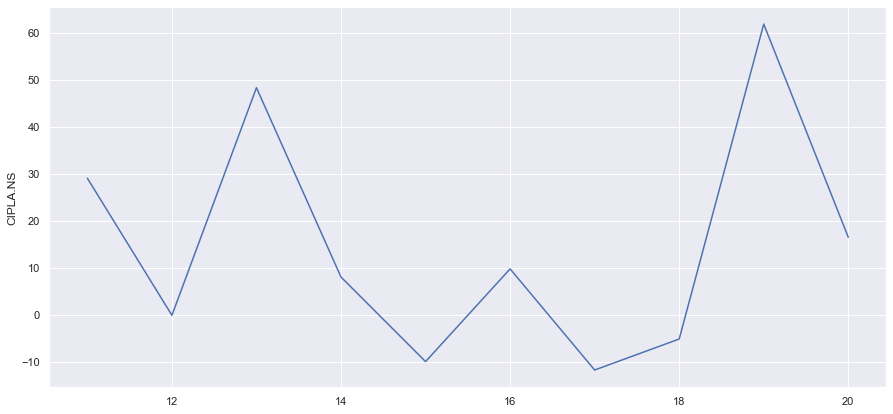

In [19]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line["CIPLA.NS"])

<AxesSubplot:ylabel='COALINDIA.NS'>

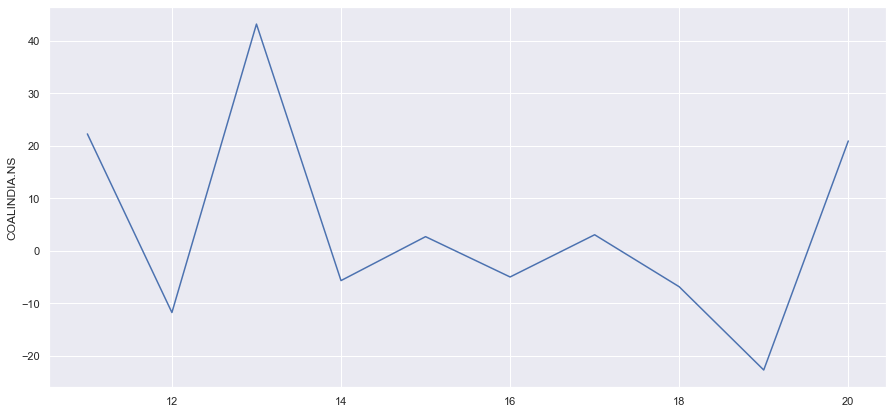

In [20]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line["COALINDIA.NS"])

<AxesSubplot:ylabel='ICICIBANK.NS'>

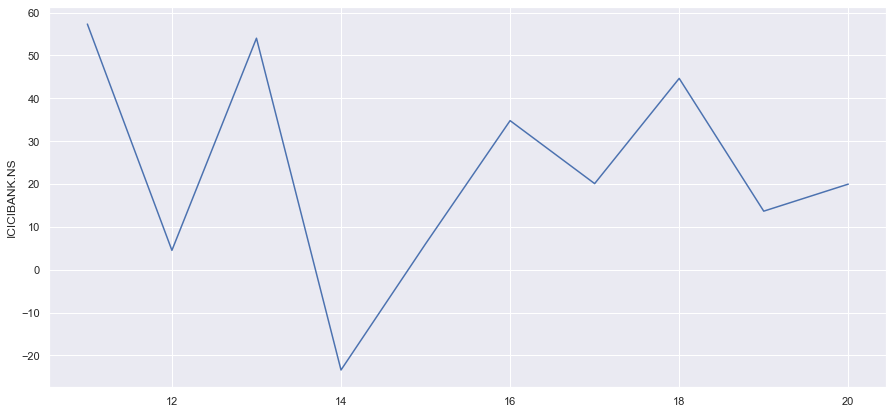

In [21]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line["ICICIBANK.NS"])

<AxesSubplot:ylabel='NESTLEIND.NS'>

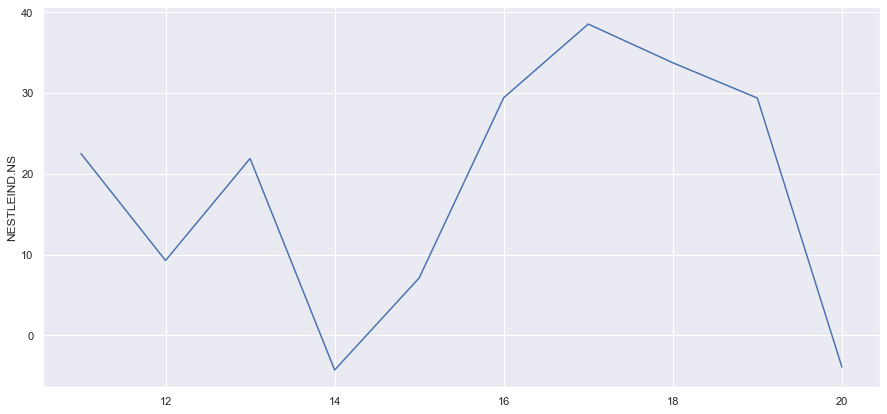

In [22]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line["NESTLEIND.NS"])

<AxesSubplot:ylabel='RELIANCE.NS'>

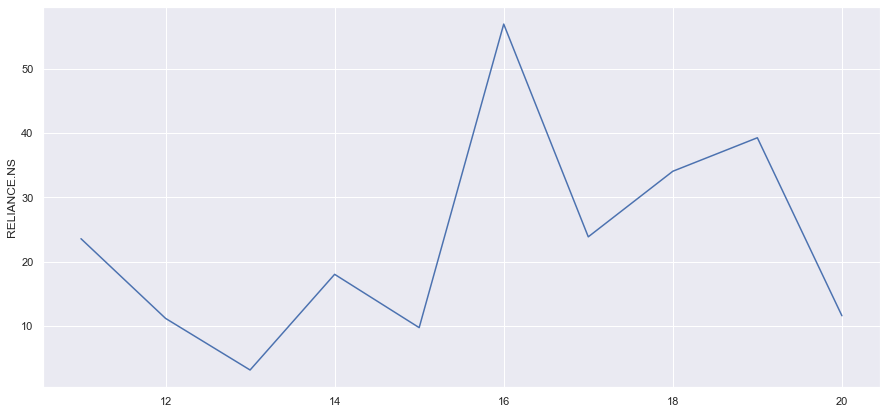

In [23]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line["RELIANCE.NS"])

<AxesSubplot:ylabel='TCS.NS'>

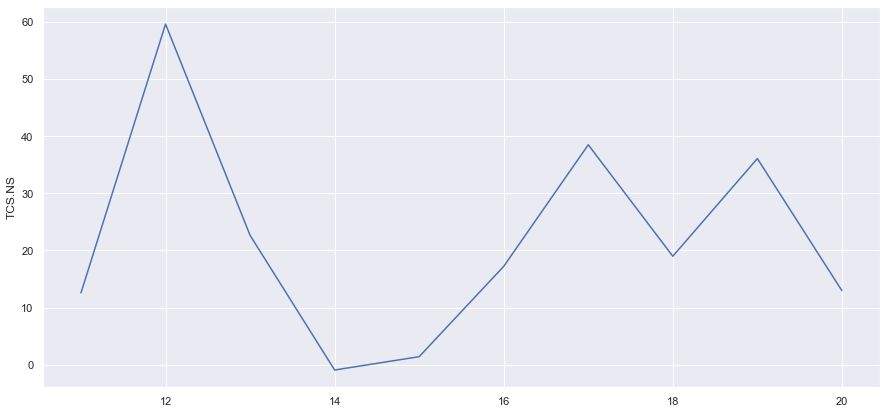

In [24]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line["TCS.NS"])

<AxesSubplot:ylabel='^NSEI'>

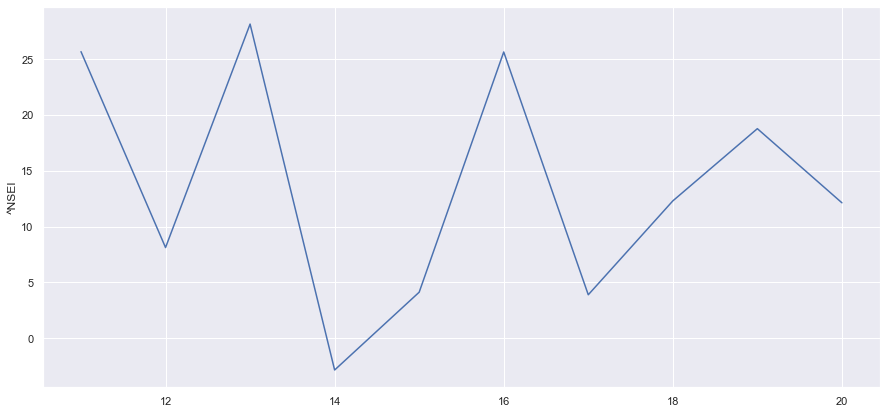

In [25]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line["^NSEI"])

<AxesSubplot:>

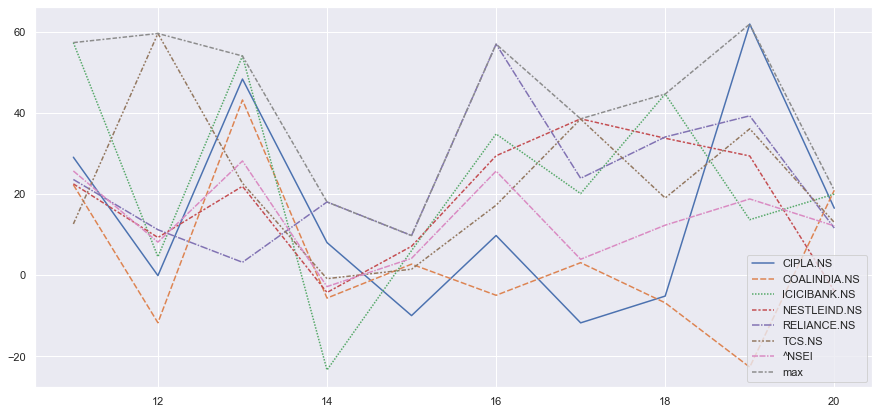

In [29]:
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line)

<AxesSubplot:>

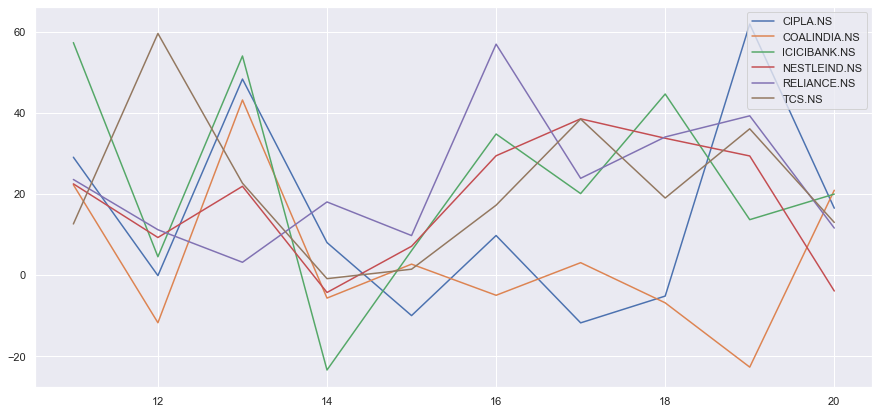

In [34]:
volatility = chart_line[['CIPLA.NS', 'COALINDIA.NS', 'ICICIBANK.NS', 'NESTLEIND.NS', 'RELIANCE.NS', 'TCS.NS']]

volatility.plot(figsize = (15, 7))

### Analysis - Yearly:
- CIPLA.NS stocks has been doing poorly for several years.
-COALINDIA.NS stocks has been doing poorly for several years.
-ICICIBANK.NS consistently out-performed the S&P500
-NESTLEIND.NS has been in the news a lot. 70% of their products are unhealthy, this news came up few days back. Future is very uncertain.  
-RELIANCE.NS consistently out-performed the S&P500
-TCS.NS consistently out-performed the S&P500


In [35]:
#  performance for last "perf_m" months
perf_m = 24

# create dataframe
perf_mth = pd.DataFrame()   
perf_mth['YR-MTH'] = yf_percent['YR-MTH'].sort_values().unique()


#  calculate returns
for x in symbols:
    perf_mth[x] = yf_percent[x].groupby(yf_percent['YR-MTH']).sum().values
    perf_mth[x] = round(perf_mth[x],2)


#  update dataframe to last "perf_m" years
perf_mth = perf_mth.tail(perf_m)

#  total returns per year rows
perf_mth.loc['total'] = perf_mth.sum(numeric_only = True, axis = 0)
perf_mth.loc['total', 'YR-MTH'] = ''


# col_name with max row_values
perf_mth['maxSYM'] = perf_mth[symbols].idxmax(axis=1)
perf_mth['max']   = perf_mth[symbols].max(axis=1)


#  performance for last 24 months (2 years)
perf_m = 24
perf_mth.tail(perf_m)

,YR-MTH,CIPLA.NS,COALINDIA.NS,ICICIBANK.NS,NESTLEIND.NS,RELIANCE.NS,TCS.NS,^NSEI,maxSYM,max
218,2019-08,-9.47,-9.61,-3.24,11.59,8.07,2.58,-0.73,NESTLEIND.NS,11.59
219,2019-09,-10.21,8.47,6.69,7.97,6.92,-7.19,4.28,COALINDIA.NS,8.47
220,2019-10,9.68,4.10,6.94,7.49,9.64,9.97,3.52,TCS.NS,9.97
221,2019-11,0.22,-0.83,10.41,-3.25,5.97,-9.77,1.53,ICICIBANK.NS,10.41
222,2019-12,2.56,3.26,5.15,2.80,-2.25,5.42,0.95,TCS.NS,5.42
223,2020-01,-6.67,-14.61,-2.29,4.02,-6.75,-3.50,-1.64,NESTLEIND.NS,4.02
224,2020-02,-10.26,-7.18,-5.29,3.03,-5.76,-3.60,-6.42,NESTLEIND.NS,3.03
225,2020-03,7.05,-7.54,-38.34,5.02,-12.60,-6.46,-23.75,CIPLA.NS,7.05
226,2020-04,35.03,6.43,19.16,10.81,29.03,11.18,14.50,CIPLA.NS,35.03
227,2020-05,10.00,-4.25,-11.65,-0.99,1.40,-1.77,-2.48,CIPLA.NS,10.00


In [36]:
chart_line_month = perf_mth.drop("total")
chart_line_month

,YR-MTH,CIPLA.NS,COALINDIA.NS,ICICIBANK.NS,NESTLEIND.NS,RELIANCE.NS,TCS.NS,^NSEI,maxSYM,max
217,2019-07,-5.24,-21.14,-2.28,-1.88,-6.98,-0.52,-5.80,TCS.NS,-0.52
218,2019-08,-9.47,-9.61,-3.24,11.59,8.07,2.58,-0.73,NESTLEIND.NS,11.59
219,2019-09,-10.21,8.47,6.69,7.97,6.92,-7.19,4.28,COALINDIA.NS,8.47
220,2019-10,9.68,4.10,6.94,7.49,9.64,9.97,3.52,TCS.NS,9.97
221,2019-11,0.22,-0.83,10.41,-3.25,5.97,-9.77,1.53,ICICIBANK.NS,10.41
222,2019-12,2.56,3.26,5.15,2.80,-2.25,5.42,0.95,TCS.NS,5.42
223,2020-01,-6.67,-14.61,-2.29,4.02,-6.75,-3.50,-1.64,NESTLEIND.NS,4.02
224,2020-02,-10.26,-7.18,-5.29,3.03,-5.76,-3.60,-6.42,NESTLEIND.NS,3.03
225,2020-03,7.05,-7.54,-38.34,5.02,-12.60,-6.46,-23.75,CIPLA.NS,7.05
226,2020-04,35.03,6.43,19.16,10.81,29.03,11.18,14.50,CIPLA.NS,35.03


<AxesSubplot:ylabel='CIPLA.NS'>

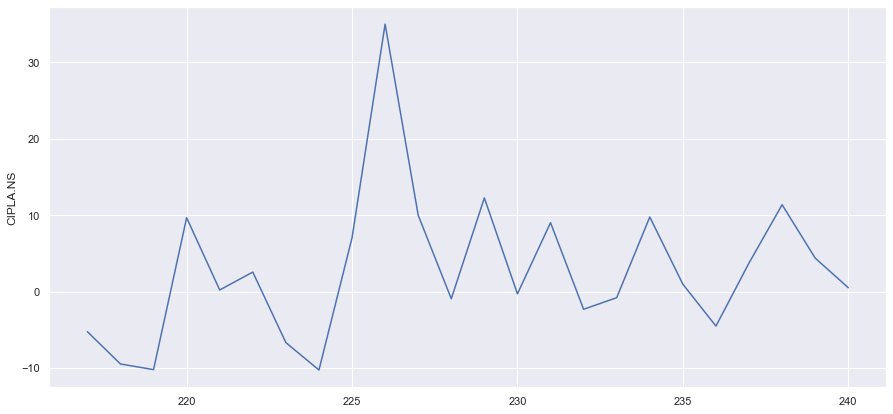

In [37]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line_month["CIPLA.NS"])

<AxesSubplot:ylabel='COALINDIA.NS'>

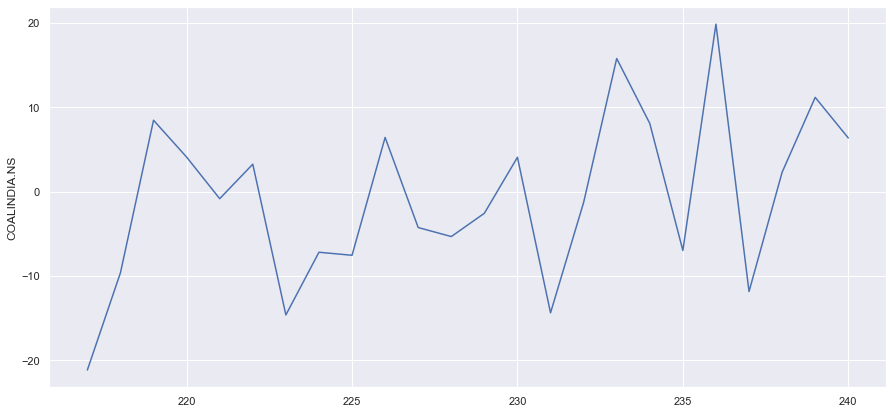

In [38]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line_month["COALINDIA.NS"])

<AxesSubplot:ylabel='ICICIBANK.NS'>

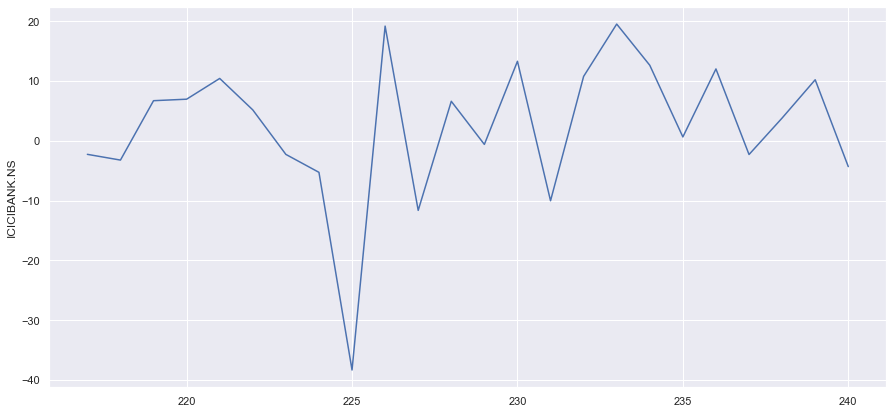

In [39]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line_month["ICICIBANK.NS"])

<AxesSubplot:ylabel='NESTLEIND.NS'>

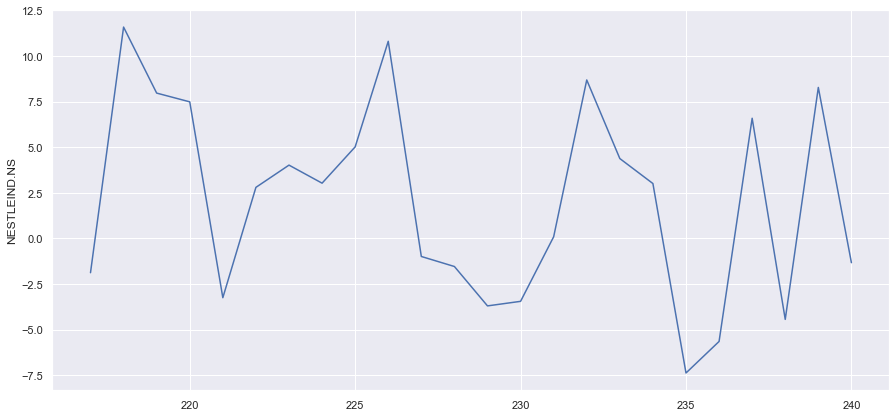

In [40]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line_month["NESTLEIND.NS"])

<AxesSubplot:ylabel='RELIANCE.NS'>

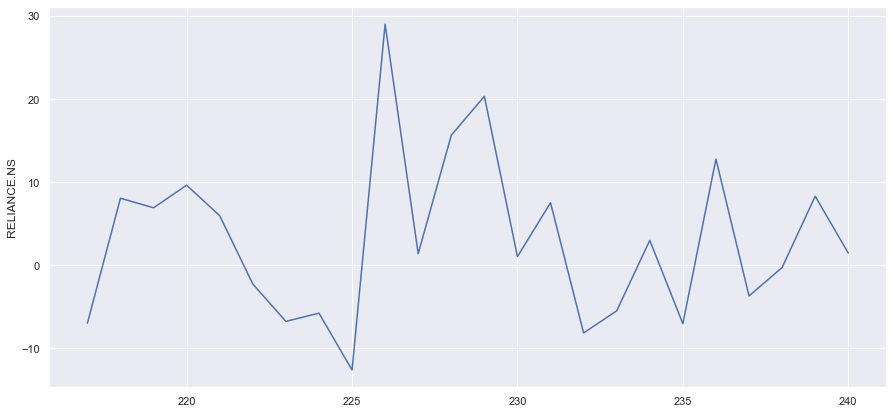

In [41]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line_month["RELIANCE.NS"])

<AxesSubplot:ylabel='TCS.NS'>

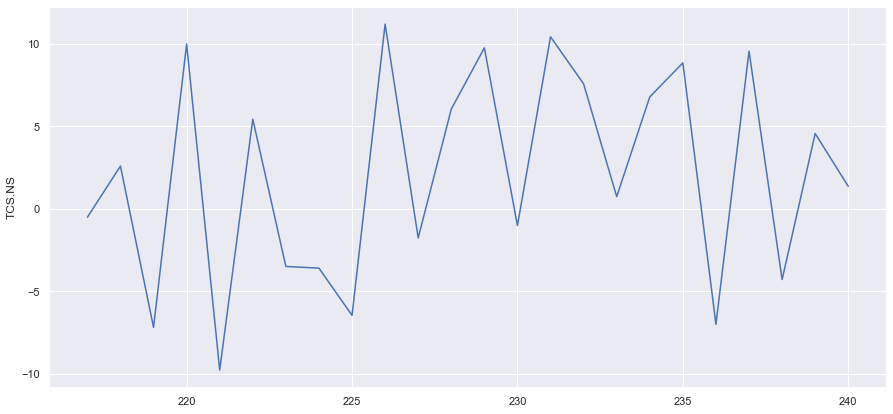

In [42]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line_month["TCS.NS"])

<AxesSubplot:ylabel='^NSEI'>

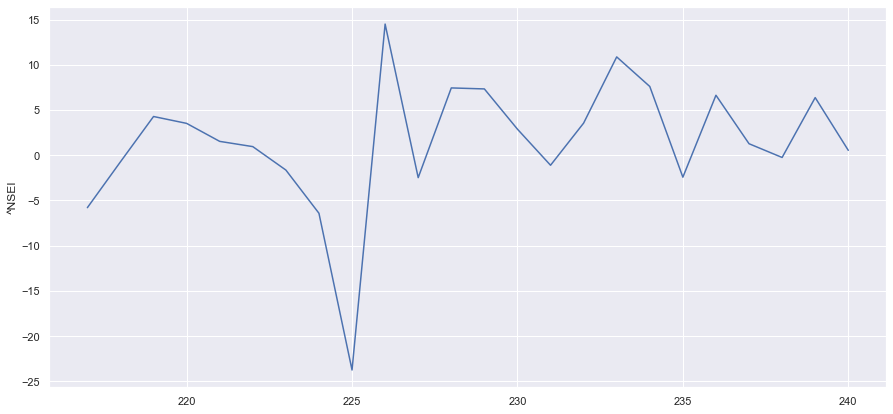

In [43]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line_month["^NSEI"])

<AxesSubplot:>

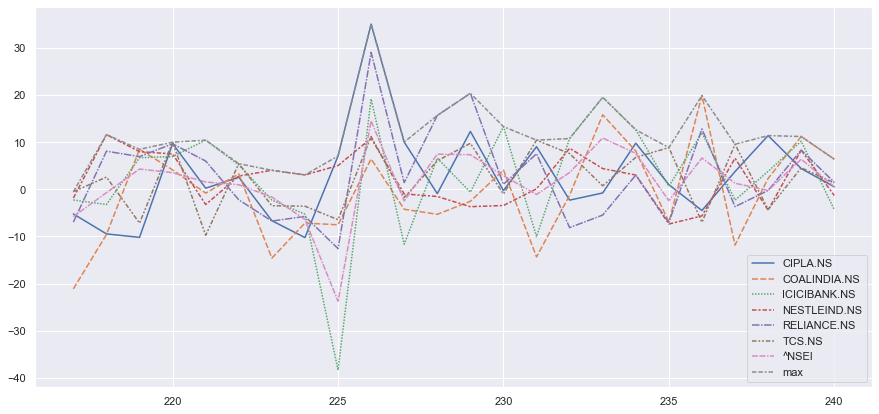

In [44]:
fig, ax = plt.subplots(figsize = (15,7))
fig.set_size_inches(15,7)
sns.lineplot(data=chart_line_month)

<AxesSubplot:>

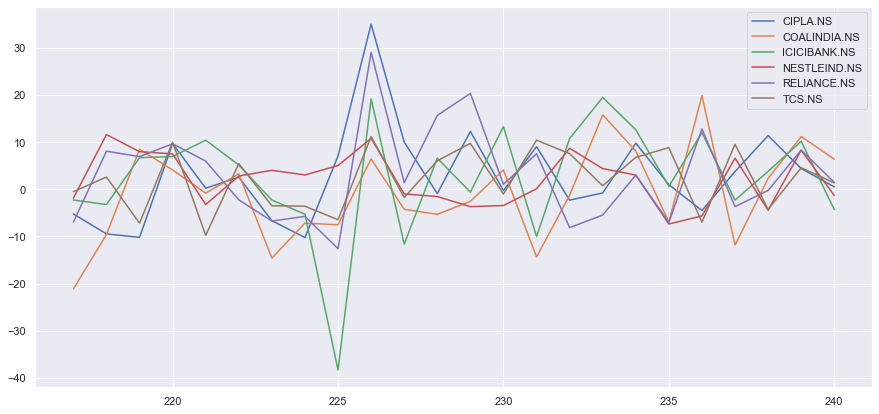

In [45]:
volatility = chart_line_month[['CIPLA.NS', 'COALINDIA.NS', 'ICICIBANK.NS', 'NESTLEIND.NS', 'RELIANCE.NS', 'TCS.NS']]

volatility.plot(figsize = (15, 7))

### Analysis - Monthly:
As we can the data for past 2 years all companies are performing poor and the reason is because of covid-19 the economies are down.

- CIPLA.NS  is volatile but has been going up considerable for the past 6 months
-COALINDIA.NS is performing poorly
-ICICIBANK.NS has consistently out-performed the S&P500 and has great returns for the last two years
-NESTLEIND.NS is performing poorly
-RELIANCE.NS has consistently out-performed the S&P500 and has great returns for the last two years
-TCS.NS consistently out-performed the S&P500


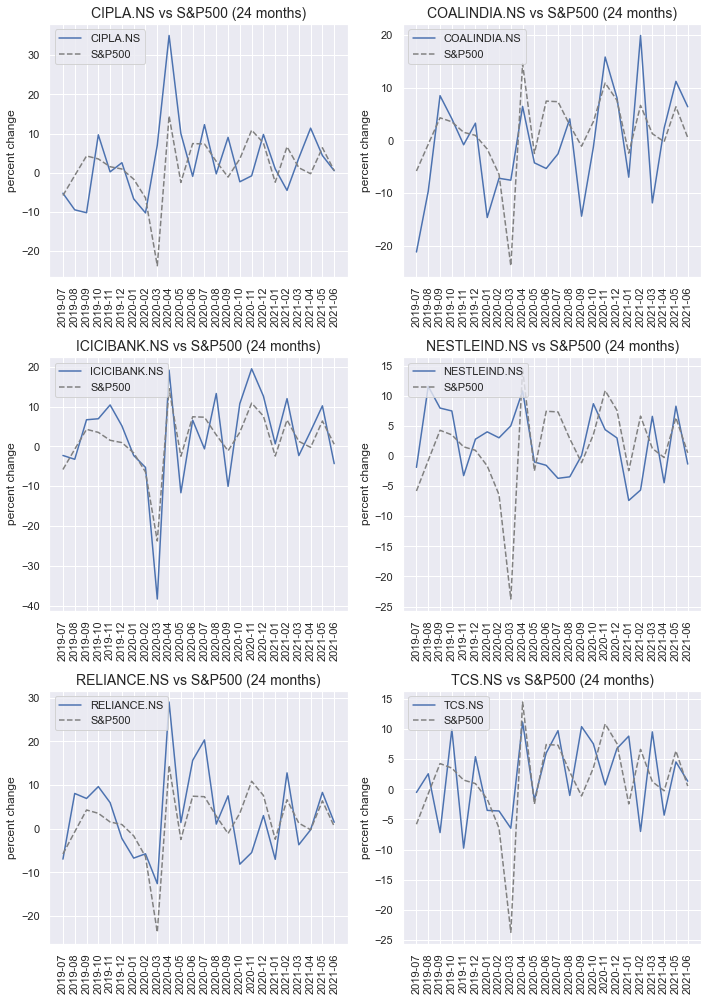

In [46]:
#  Plot Monthly Returns
#    - head(-1)    - all rows except last
df_plot = perf_mth[symbols].head(-1).tail(perf_m)
df_plot['YR-MTH'] = perf_mth['YR-MTH'].head(-1).tail(perf_m)


#  set up the subplot
c = 2                         # columns for subplot
r = int((len(symbols)+1)/c)   # rows for subplot
s = 1                         # initialize subplot counter
fig_y = (c+r)*3               # multiple may need to be modified

#  figure size
plt.figure(figsize=(10, fig_y))

#  subplot loop
for i in symbols:
    if i != '^NSEI':
        plt.subplot(r,c,s)
        sns.lineplot(x = df_plot['YR-MTH'], y = df_plot[i])
        sns.lineplot(x = df_plot['YR-MTH'], y = df_plot['^NSEI'], color='gray',ls='--')
        plt.legend([i,'S&P500'],loc=2)  # top left
        plt.title('{} vs S&P500 ({} months)'.format(i,perf_m), fontsize=14)
        plt.xlabel('')
        plt.ylabel('percent change')
        plt.xticks(rotation=90)
        s = s + 1  # increment subplot counter

plt.tight_layout()
plt.show()

### Analysis:
- Stocks that loosely follow and out-perform the S&P500 are generally good long-term investments (in our case, CIPLA.NS, RELIANCE.NS, ICICIBANK.NS and TCS.NS )

In [47]:
# Dividends
yf_div = pd.DataFrame()   # initialize dataframe

for i in symbols:
    if i != '^NSEI':
        x = pd.DataFrame(yf.Ticker(i).dividends)
        x.index = x.index.year
        x = x.rename(columns={"Dividends":i})
        x = round(x.groupby(x.index).sum(),2)
        yf_div = pd.concat([yf_div,x], axis=1)
        print('{}\t- dividends'.format(i))
        
yf_div.tail(10) 

CIPLA.NS	- dividends
COALINDIA.NS	- dividends
ICICIBANK.NS	- dividends
NESTLEIND.NS	- dividends
RELIANCE.NS	- dividends
TCS.NS	- dividends


,CIPLA.NS,COALINDIA.NS,ICICIBANK.NS,NESTLEIND.NS,RELIANCE.NS,TCS.NS
Date,,,,,,
2012,2.0,10.00,3.00,48.5,4.21,8.50
2013,2.0,14.00,3.64,48.5,4.46,12.00
2014,2.0,29.00,8.36,43.0,4.71,34.50
2015,2.0,20.70,4.55,42.5,4.95,25.50
2016,2.0,27.40,4.55,58.5,5.20,22.75
2017,2.0,18.75,2.27,86.0,5.45,24.00
2018,3.0,23.75,4.50,136.0,5.94,26.00
2019,3.0,5.85,2.00,308.0,6.44,67.00
2020,1.0,19.50,NaN,318.0,6.50,40.00


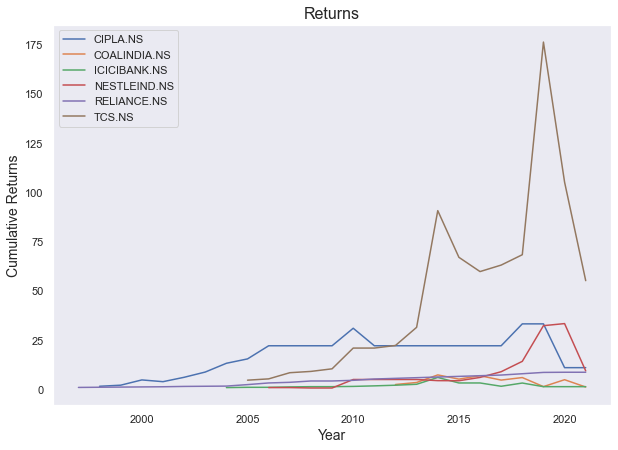

In [49]:
# Plot all the close prices
((yf_div.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Thank You